# ОИАД. Теория к лабораторной №3

## Типы признаков

* **Количественные/непрерывные** - бесконечное число значений или, по крайней мере, очень много. Например, рост человека, зарпалата.
* **Бинарные** - всего 2 значения. Например, пол: мальчик, девочка.
* **Категориальные/номинальные** - принимают конечное число значений. Значения нельзя упорядочить. Наример, уровни должности, грейды. (Старший специалист > стажера)
* **Порядковые/ранговые** - конечное число значений, можно упорядочить. Например, цвета, города (Нельзя сказать, что красный > зеленого).

## Преобразование признаков в численные
**Бинарные**
Одно из значений заменяют $1$, другое $0$.

**Порядковые**
Порядковые признаки можно просто пронумеровать. Это сохранит порядок среди значений.

| X                  |
| ------------------ |
| младший специалист |
| старший специалист |
| среднийспециалист  |
| босс               |

$\rightarrow$
| X   |
| --- |
| 1   |
| 3   |
| 2   |
| 4   |

*Какой недостаток у такого подхода?*

**Номинальные**
Под каждое уникальное значение признака создается столбец. У каждого объекта в столбец, отвечающий за соотвествующее значение, ставится $1$, в остальные - $0$.

| X       |
| ------- |
| Красный |
| Синий   |
| Красный |
| Зеленый |

$\rightarrow$

| Красный | Синий | Зеленый |
| ------- | ----- | ------- |
| 1       | 0     | 0       |
| 0       | 1     | 0       |
| 1       | 0     | 0       |
| 0       | 0     | 1       |

## Многомерная линейная регрессия

Матрица объекты-признаки $X$ размера $\ell \times n$, где $\ell$ - чило объектов выборке, а каждый оъект описывается $n$ признаками. Будем считать, что среди признаков есть константа.
Параметры модели $w$ - вектор стобец размера $n$.

Модель регрессии
$$
f(x, w) = \sum_{i=1}^{n} w_i x_i = Xw
$$

Функционал потерь
$$
Q(w) = \sum_{i=1}^{\ell} (f(x_i, w) - y_i)^2 = ||Xw - y||^2 \rightarrow \min_{w} 
$$

Градиент функционала потерь
$$
\frac{\partial Q}{\partial w} = 2X^T(Xw-y)
$$

**Аналитическое решение**
Для поиска точки минимума, приравниваем градиент к нулю.
$$
2X^T(Xw-y) = 0
$$

$$
X^TXw = X^Ty
$$

$$
w^* = (X^TX)^{-1}X^Ty
$$

*В каких случаях могут возникнуть проблемы с решением?*

**Численное решение**
Подобные оптимизационные задачи решаются градиентными методами. Основная идея состоит в итерационном движении от одной точки к другой в пространстве параметров модели. Направление движения определяется с помощью градиента функции. Градиент функции в некоторой точке указывает направление наискорейшего роста. Мы же хотим минимизировать функцию, поэтому направление выберем как минус градиент в этой точке. Размер шага будет определятся абсолютным значением градиента в точке и некоторым параметром.

## Градиентные методы
**Метод градиентного спуска**
Классический метод градиентного спуска. Другие методы модифицируют его, внося изменения в подход к определению размеру или направлению шага.

$w^{(0)}$ - начальное приближение
$\lambda$ - размер градиентного шага

$w^{(k+1)} = w^{(k)} - \lambda \cdot \frac{\partial Q}{\partial w}|_{w=w^{(k)}}$

Остановка просходит в случаях:
* градиент близок к нулю
* изменение параметров близко к нулю
* достигнуто ограничительное число итераций
  
**Стохастический градиентный спуск**
Идея состоит в расчете не точного значения градиента $\frac{\partial Q}{\partial w}|_{w=w^{(k)}}$ на всей выборке $X$ размера $\ell$, а оценке его значения по части выборки $\tilde{X} \subset X$ меньшего размера $\tilde{\ell} < \ell$.

*Какое преимущество имеет этот метод по сравнению с классическим?*

## Регуляризация
В случае сильной корреляции между признаками (столбцами матрицы $X$), обращение матрицы $(X^TX)^{-1}$ ведет к увеличению её абсолютных значений (а в случае полной линейной зависимости - вообще необратимости), и в результате веса модели становятся большими по модулю и неустойчивыми.
Бороться с этим эффектом можно с помощью регуляризации. В функционал ошибки добавляют слагаемое, пропорциональное норме весов. Таким образом можно получить различные модификации регрессионной модели. 

**Гребневая регрессия**
$$
Q_{L_2}(w) = ||Xw - y||^2 + \alpha ||w||_2^2 \rightarrow \min_{w}
$$

$$
||a||_2 = \sqrt{\sum_{i=1}^{n} a_i^2}
$$

Имеет аналитическое решение
$$
w^* = (X^TX + \alpha I)^{-1}X^Ty
$$
где $I$ - единичная матрица

Градиент
$$
\frac{\partial Q_{L_2}}{\partial w} = 2 X^T (Xw - y) + 2 \alpha w
$$


**LASSO (Least Absolute Shrinkage and Selection Operator)**
$$
Q_{L_1}(w) = ||Xw - y||^2 + \beta ||w||_1 \rightarrow \min_{w}
$$

$$
||a||_1 = \sum_{i=1}^{n} |a_i|
$$

Эта задача не имеет аналитического решения

$$
\frac{\partial Q_{L_1}}{\partial w} = 2 X^T (Xw - y) + \beta~sign(w)
$$

## Оценка обобщающей способности
Построение регрессионной модели и оценка ее качества на одних и тех же данных не покажет, сохранится ли её качество на новых данных.
Поэтому набор данных случайным образо разбивают на 2 выборки: 
* обучающую, на которой подбирают параметры модели
* тестовую, на которой оценивают качество

# ОИАД. Лабораторная работа №3

https://www.kaggle.com/datasets/mosapabdelghany/medical-insurance-cost-dataset?resource=download

## 1. Подготовка данных
1. проверить наличие пропусков и выбросов
2. привести категориальные признаки к числовым
3. вычислить парные корреляции признаков

## 2. Многомерная линейная регрессия
Построить модель линейной регрессии и подобрать параметры:
1. аналитически (реализовать самому)
2. численно, с помощью методов градиентного спуска (реализовать самому)

## 3. Добавление регуляризации
Модифицировать линейную модель путем добавления регуляризационного слагаемого. Найти оптимальные веса:
1. аналитически
2. численно

## 4. Оценка обобщающей способности
Сравнить между собой модели на тестовых данных по среднему квадрату ошибки:
1. константную - прогноз средним значением
2. из пункта 2
3. из пункта 3

In [1]:
import numpy as np
import pandas as pd

def load_data(train_path='insurance_train.csv', test_path='insurance_test.csv'):
    train = pd.read_csv(train_path)
    test = pd.read_csv(test_path)
    return train, test

train_df, test_df = load_data()
print(train_df)

     age     sex     bmi  children smoker     region      charges
0     26    male  27.060         0    yes  southeast  17043.34140
1     58    male  36.955         2    yes  northwest  47496.49445
2     20  female  24.420         0    yes  southeast  26125.67477
3     51  female  38.060         0    yes  southeast  44400.40640
4     62  female  25.000         0     no  southwest  13451.12200
..   ...     ...     ...       ...    ...        ...          ...
333   25  female  22.515         1     no  northwest   3594.17085
334   18    male  53.130         0     no  southeast   1163.46270
335   64    male  37.905         0     no  northwest  14210.53595
336   54  female  47.410         0    yes  southeast  63770.42801
337   28  female  25.800         0     no  southwest   3161.45400

[338 rows x 7 columns]


# 1. Подготовка данных
1. проверить наличие пропусков и выбросов

In [2]:
def find_outliers(df):
    print("\nMissing values per column:\n", df.isna().sum())
    num = df.select_dtypes(include=[np.number])
    for col in num.columns:
        Q1 = num[col].quantile(0.25)
        Q3 = num[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        n_out = ((num[col] < lower) | (num[col] > upper)).sum()
        if n_out > 0:
            print(f"Outliers in {col}: {n_out} out of {len(df)}")

find_outliers(train_df)
find_outliers(test_df)


Missing values per column:
 age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
Outliers in bmi: 5 out of 338
Outliers in charges: 19 out of 338

Missing values per column:
 age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
Outliers in bmi: 4 out of 1000
Outliers in charges: 112 out of 1000


2. привести категориальные признаки к числовым

## Преобразование признаков в численные
**Бинарные**
Одно из значений заменяют $1$, другое $0$.

**Порядковые**
Порядковые признаки можно просто пронумеровать. Это сохранит порядок среди значений.

| X                  |
| ------------------ |
| младший специалист |
| старший специалист |
| среднийспециалист  |
| босс               |

$\rightarrow$
| X   |
| --- |
| 1   |
| 3   |
| 2   |
| 4   |

In [3]:
#Найдём столбики которые не являются числовыми
def get_categorical_columns(df):
    return df.select_dtypes(include=['object', 'category']).columns.tolist()

print(get_categorical_columns(train_df))


['sex', 'smoker', 'region']


In [4]:
# Приводим эти колонки к виду который представлен выше:
# enumeraate нумерует колонки численными значениями
# Возвращает поменяный датафрейм, и словарь отношений по типу:
# 'region': {'northeast': 0, 'northwest': 1, 'southeast': 2, 'southwest': 3}
def label_encode(df, cat_cols = None):
    if cat_cols is None:
        cat_cols = get_categorical_columns(df)
    df2 = df.copy()
    mappings = {}
    for col in cat_cols:
        df2[col] = df2[col].astype('category')
        mapping = {cat: code for code, cat in enumerate(df2[col].cat.categories)}
        df2[col] = df2[col].cat.codes
        mappings[col] = mapping
    return df2, mappings

train_df_2, mappings = label_encode(train_df)
test_df_2, mappings = label_encode(test_df)
print(train_df_2)
print(mappings)

     age  sex     bmi  children  smoker  region      charges
0     26    1  27.060         0       1       2  17043.34140
1     58    1  36.955         2       1       1  47496.49445
2     20    0  24.420         0       1       2  26125.67477
3     51    0  38.060         0       1       2  44400.40640
4     62    0  25.000         0       0       3  13451.12200
..   ...  ...     ...       ...     ...     ...          ...
333   25    0  22.515         1       0       1   3594.17085
334   18    1  53.130         0       0       2   1163.46270
335   64    1  37.905         0       0       1  14210.53595
336   54    0  47.410         0       1       2  63770.42801
337   28    0  25.800         0       0       3   3161.45400

[338 rows x 7 columns]
{'sex': {'female': 0, 'male': 1}, 'smoker': {'no': 0, 'yes': 1}, 'region': {'northeast': 0, 'northwest': 1, 'southeast': 2, 'southwest': 3}}


# вычислить парные корреляции признаков

In [5]:
# Метод corr датафрейма высчитывает матрицу корреляций между всеми признакми
# Выбранным методом
# method{‘pearson’, ‘kendall’, ‘spearman’}
# Проверим все доступные меотды  
def compute_correlations(df, method = 'pearson'):
    num_df = df.select_dtypes(include=[np.number])
    corr = num_df.corr(method=method)
    return corr

#===============================================
pd.options.display.float_format = '{:.2f}'.format
#===============================================

print("Pearson")
print(compute_correlations(train_df_2))
print("Kendall")
print(compute_correlations(train_df_2, 'kendall'))
print("Spearman")
print(compute_correlations(train_df_2, 'spearman'))


Pearson
           age   sex  bmi  children  smoker  region  charges
age       1.00 -0.05 0.08      0.05    0.01    0.02     0.30
sex      -0.05  1.00 0.04     -0.01    0.12   -0.05     0.06
bmi       0.08  0.04 1.00      0.06    0.05    0.20     0.22
children  0.05 -0.01 0.06      1.00   -0.00    0.03     0.07
smoker    0.01  0.12 0.05     -0.00    1.00   -0.08     0.78
region    0.02 -0.05 0.20      0.03   -0.08    1.00    -0.07
charges   0.30  0.06 0.22      0.07    0.78   -0.07     1.00
Kendall
           age   sex  bmi  children  smoker  region  charges
age       1.00 -0.04 0.06      0.06    0.01    0.02     0.45
sex      -0.04  1.00 0.02     -0.00    0.12   -0.04     0.00
bmi       0.06  0.02 1.00      0.05    0.05    0.15     0.10
children  0.06 -0.00 0.05      1.00    0.00    0.01     0.12
smoker    0.01  0.12 0.05      0.00    1.00   -0.07     0.56
region    0.02 -0.04 0.15      0.01   -0.07    1.00    -0.08
charges   0.45  0.00 0.10      0.12    0.56   -0.08     1.00
Spearman

## 2. Многомерная линейная регрессия
Построить модель линейной регрессии и подобрать параметры:
1. аналитически (реализовать самому)

In [6]:
# В наших данных целевой переменной является столбец charges, будем строить регрессию
# относительно этого столбца
# Для этого разделим датафрейм на x и y, где x - признаки, y - вектор целевой переменной
def prepare_data(df):
    # Целевая переменная
    y = df['charges'].values

    # Копия без целевой
    X = df.drop(columns=['charges']).copy()
    
    return X, y

train_preped, y = prepare_data(train_df_2)
test_preped, y_test = prepare_data(test_df_2)

$$
w^* = (X^TX)^{-1}X^Ty
$$

In [7]:
def normal_equation(X, y):
    XT = X.T #транспонированая матрица
    # @ - оператор умножения матриц
    # np.linalg.inv высчитывает обратную матрицу
    w = np.linalg.inv(XT @ X) @ XT @ y
    return w

w_analytic = normal_equation(train_preped, y)
# получим вектор весов
print(w_analytic)

0     194.50
1   -1348.18
2      95.11
3     332.09
4   23220.30
5    -706.96
dtype: float64


# Для оценки модели используем Mean Squared Error:

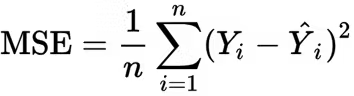

## Где y - настоящие значение, y с крышкой - полученные нашей моделью

In [8]:
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)


y_pred_analytic = test_preped.values @ w_analytic

mse_analytic = mse(y_test, y_pred_analytic)
print("=== Аналитическое ===")
print("MSE:", round(mse_analytic, 2))

=== Analytical ===
MSE: 38552517.24


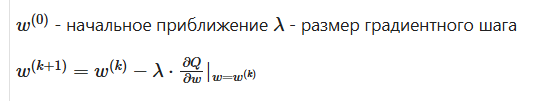
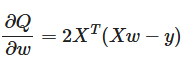

In [9]:
def gradient_descent(X, y, lr = 1e-5, n_iter = 10000):
    n, d = X.shape
    w = np.zeros(d)
    losses = []

    for i in range(n_iter):
        # предугадываем значения с весами итерации
        y_pred = X @ w
        # Вычисляем ошибку
        error = y_pred - y
        # Вычисляем градиент (dQ/dw)
        grad = (2/n) * X.T @ error
        # обновляем веса
        w -= lr * grad
        # высчитываем функцию потерь
        loss = (error**2).mean()
        losses.append(loss)

        if i % (n_iter // 10) == 0:
            print(f"Iter {i:5d}: loss={loss:.4f}")

    return w, losses

w_gd, losses = gradient_descent(train_preped, y, lr=0.0001, n_iter=20000)
print(w_gd)
y_pred_gd = test_preped @ w_gd
mse_gd = mse(y_test, y_pred_gd)
print("Градиентный спуск")
print("MSE:", round(mse_gd, 2))

Iter     0: loss=361771951.7876
Iter  2000: loss=130549351.3452
Iter  4000: loss=119191470.5594
Iter  6000: loss=109695616.7376
Iter  8000: loss=101598760.6219
Iter 10000: loss=94627060.1428
Iter 12000: loss=88594970.5083
Iter 14000: loss=83362872.2874
Iter 16000: loss=78818518.2153
Iter 18000: loss=74868300.0837
age          204.45
sex          157.97
bmi          163.49
children     341.00
smoker     11653.29
region     -1127.00
dtype: float64
Градиентный спуск
MSE на тесте: 61509516.98


# Чтобы проверить адекватность обучения построим графики потерь

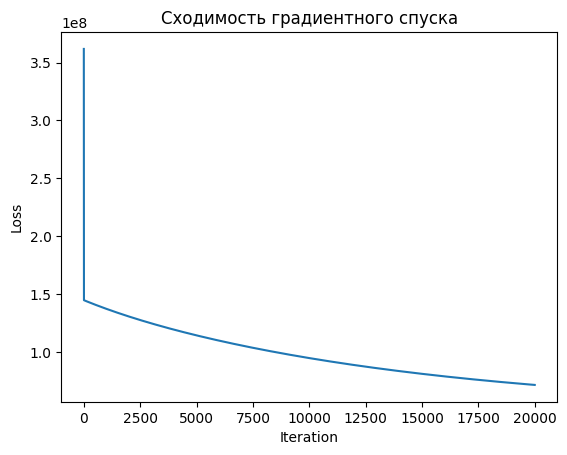

In [10]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.title("Сходимость градиентного спуска")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.show()

# 3. Добавление регуляризации
Модифицировать линейную модель путем добавления регуляризационного слагаемого. Найти оптимальные веса:

аналитически

численно

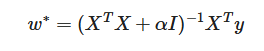

In [23]:
# Параметр alpha влияет на силу регуляризации - насколько свободный член влияет на веса модели
# При альфа = 0 - модель без регуляризации
# При альфа большом - веса "прижимаются" к нулю
def regularization_analytic(X, y, alpha):

    n, d = X.shape
    Xb = np.hstack([np.ones((n, 1)), X])  # добавляем столбик отвечающий за  регуляризационное слагаемое.
    D = Xb.shape[1]
    I = np.eye(D)
    I[0, 0] = 0.0 
    w = np.linalg.pinv(Xb.T @ Xb + alpha * I) @ (Xb.T @ y)
    return w

In [24]:
w_regular_analytic = regularization_analytic(train_preped, y, alpha=0.5)

In [26]:
print(w_regular_analytic)
#приводим матрицу к размеру вектора весов - добавляем столбик единиц, которые умножаются регуляризационное слагаемое
n = test_preped.shape[0]
test_preped_b = np.hstack([np.ones((n,1)), test_preped])
#==========================================================
y_pred_regular_analytic = test_preped_b @ w_regular_analytic
mse_analytic_reg = mse(y_test, y_pred_regular_analytic)
print("Аналитическое решение с регуляризацией")
print("MSE:", round(mse_analytic_reg, 2))

[-11044.9756211     257.43110354   -646.43327025    339.50079852
    481.87623244  23202.17010645   -554.80088453]
Аналитическое решение с регуляризацией
MSE: 34239386.7


# MSE с регуляризацией стало меньше чем без регуляризации

In [27]:
def regularization_gradient_descent(X, y, alpha=1.0, lr=1e-5, n_iter=10000):
    n, d = X.shape
    # Добавляем столбец единиц для bias регуляризационного слагаемого
    X_with_bias = np.hstack([np.ones((n, 1)), X])
    D = X_with_bias.shape[1]  # новая размерность (d + 1)
    w = np.zeros(D)
    losses = []

    for i in range(n_iter):
        # Прямое распространение
        y_pred = X_with_bias @ w
        error = y_pred - y
        
        # Функция потерь с  регуляризацией
        loss = (error**2).mean() + alpha * (w[1:]**2).mean()
        losses.append(loss)
        
        # Градиент
        grad = (2/n) * X_with_bias.T @ error
        # Добавляем регуляризацию только для весов 
        grad_reg = 2 * alpha * np.hstack([0, w[1:]]) / n
        grad += grad_reg
        
        # Обновление весов
        w -= lr * grad

        if i % (n_iter // 10) == 0:
            print(f"Iter {i:5d}: loss={loss:.4f}")

    return w, losses

In [28]:
w_gd_reg, losses2 = regularization_gradient_descent(train_preped, y, alpha=0.1, lr=1e-4, n_iter=100000)

Iter     0: loss=361771951.7876
Iter 10000: loss=95125854.1823
Iter 20000: loss=73065304.3412
Iter 30000: loss=62677417.8091
Iter 40000: loss=57856224.8514
Iter 50000: loss=55677828.9270
Iter 60000: loss=54733448.1108
Iter 70000: loss=54348045.1611
Iter 80000: loss=54202705.5572
Iter 90000: loss=54150685.5792


In [29]:
print(w_gd_reg)
#==========================================================
n = test_preped.shape[0]
test_preped_b = np.hstack([np.ones((n,1)), test_preped])
#==========================================================
y_pred_regular_grad = test_preped_b @ w_gd_reg
mse_grad_reg = mse(y_test, y_pred_regular_grad)
print("Градиентный спуск с регуляризацией")
print("MSE:", round(mse_grad_reg, 2))

[-4907.11720579   223.06253629  -899.75759775   207.35806361
   397.4682338  22500.02492232  -667.42364509]
Градиентный спуск с регуляризацией
MSE: 35905100.56


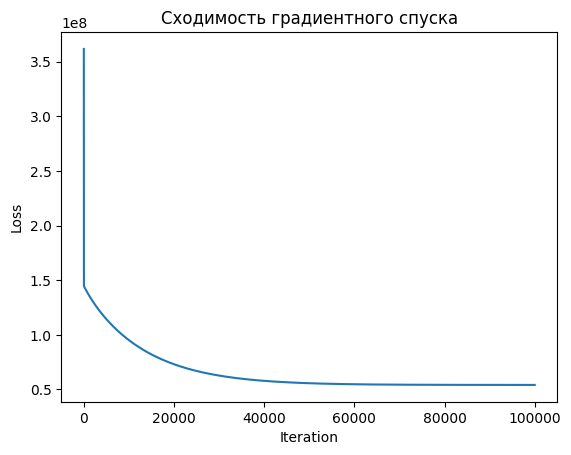

In [17]:
import matplotlib.pyplot as plt
plt.plot(losses2)
plt.title("Сходимость градиентного спуска 2")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.show()

## 4. Оценка обобщающей способности
Сравнить между собой модели на тестовых данных по среднему квадрату ошибки:
1. константную - прогноз средним значением
2. из пункта 2
3. из пункта 3

In [30]:
# Высчитываем прогноз средним значением
def baseline_constant_mse(y_train, y_test):
    y_pred = np.full_like(y_test, y_train.mean())
    mse1 = mse(y_test, y_pred)
    return mse1

mse_baseline = baseline_constant_mse(y, y_test)
print(mse_baseline)

141830094.35903943


In [32]:
print("Оценка моделей по MSE")
print(f"Константная модель: {mse_baseline:,.4f}")
print(f"Линейная регрессия аналитически: {mse_analytic:,.4f}")
print(f"Линейная регрессия градиентный спуск: {mse_gd:,.4f}")
print(f"Линейная регрессия аналитически с регуляризацией: {mse_analytic_reg:,.4f}")
print(f"Линейная регрессия градиентный спуск с регуляризацией: {mse_grad_reg:,.4f}")

Оценка моделей по MSE
Константная модель: 141,830,094.3590
Линейная регрессия аналитически: 38,552,517.2352
Линейная регрессия градиентный спуск: 61,509,516.9842
Линейная регрессия аналитически с регуляризацией: 34,239,386.6966
Линейная регрессия градиентный спуск с регуляризацией: 35,905,100.5554
